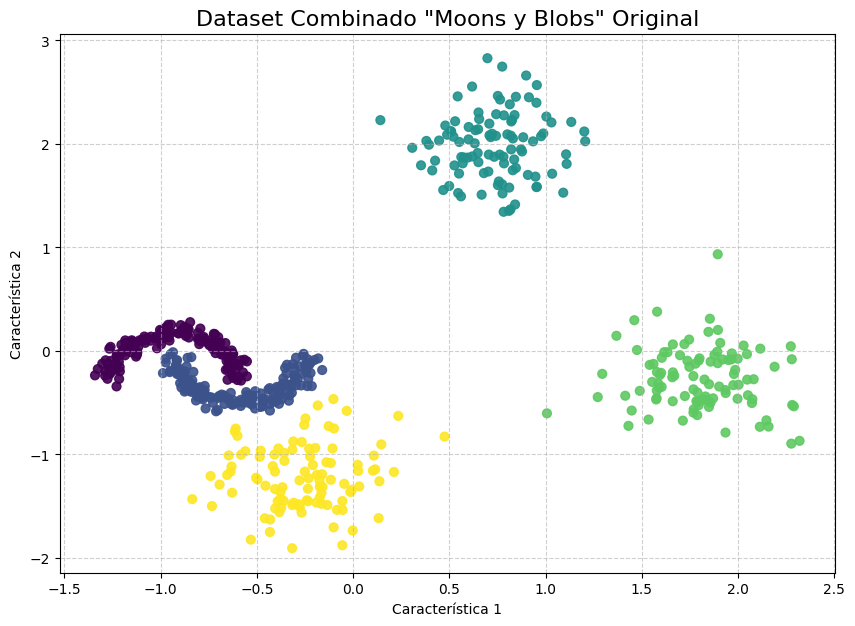

--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---
Métricas para KMeans calculadas.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Métricas para SpectralClustering calculadas.
Métricas para DBSCAN calculadas.


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (4) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(


Métricas para Birch calculadas.
Métricas para AgglomerativeClustering calculadas.




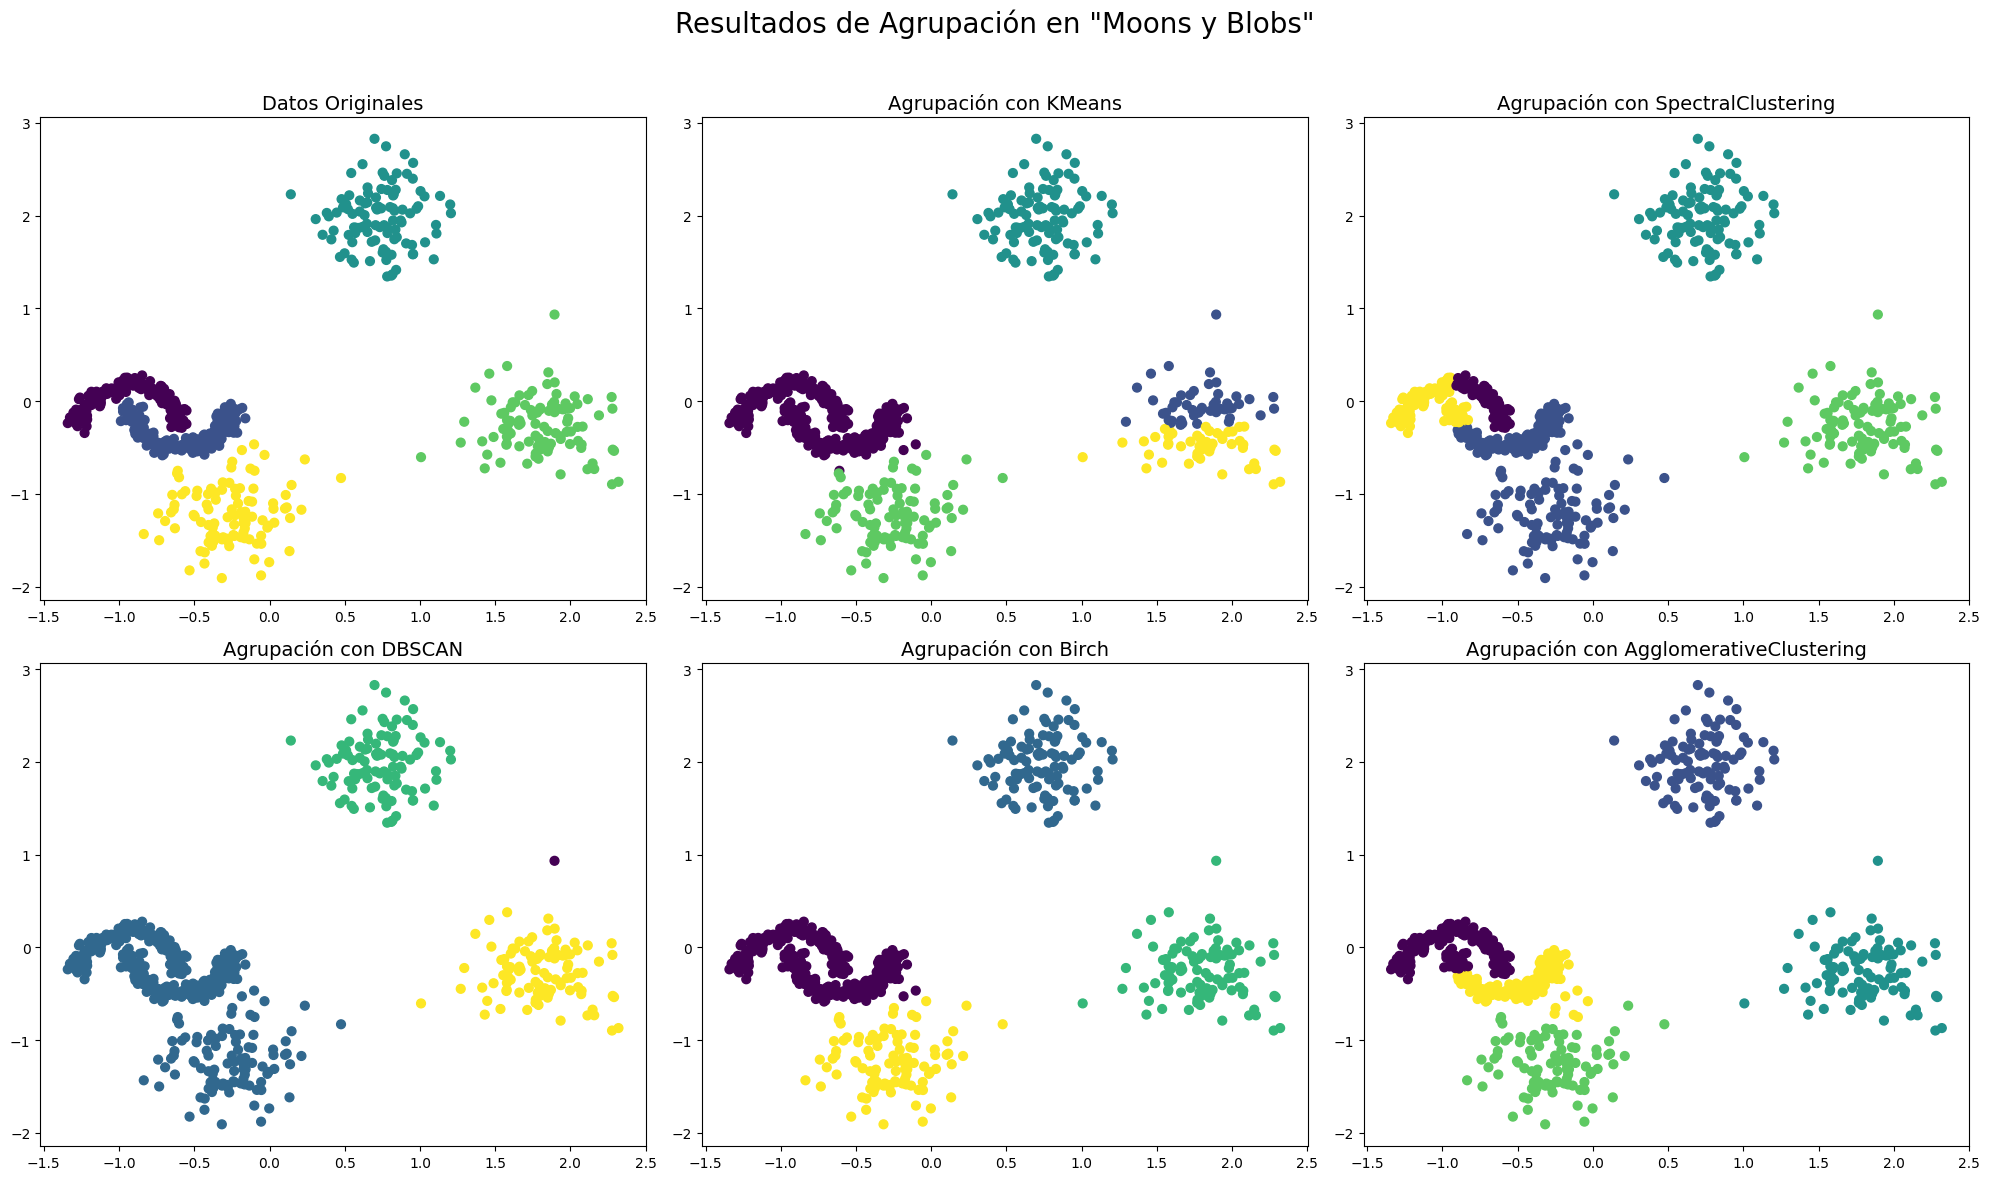


--- RESUMEN DE MÉTRICAS DE CLUSTERING ---

## KMeans:
  - Índice Rand Ajustado (ARI)    : 0.6316 (más alto es mejor)
  - Info Mutua Normalizada (NMI)  : 0.8258 (más alto es mejor)
  - V-measure                     : 0.8258 (más alto es mejor)
  - Coeficiente de Silueta        : 0.5878 (más alto es mejor)
  - Índice Davies-Bouldin         : 0.7148 (más bajo es mejor)
  - Índice Calinski-Harabasz      : 2101.6436 (más alto es mejor)
---------------------------------------------
## SpectralClustering:
  - Índice Rand Ajustado (ARI)    : 0.6316 (más alto es mejor)
  - Info Mutua Normalizada (NMI)  : 0.7974 (más alto es mejor)
  - V-measure                     : 0.7974 (más alto es mejor)
  - Coeficiente de Silueta        : 0.4259 (más alto es mejor)
  - Índice Davies-Bouldin         : 0.6670 (más bajo es mejor)
  - Índice Calinski-Harabasz      : 1598.8438 (más alto es mejor)
---------------------------------------------
## DBSCAN:
  - Índice Rand Ajustado (ARI)    : 0.4136 (más alto es m

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    AgglomerativeClustering,
    Birch,
    DBSCAN,
    KMeans,
    SpectralClustering,
)

# --- Importación de métricas ---
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    v_measure_score,
)

# --- 1 y 2. Generar y Combinar Datasets (sin cambios) ---
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
centers = [(5, 5), (8, 0), (2, -2)]
X_blobs, y_blobs = make_blobs(n_samples=300, centers=centers, cluster_std=0.7, random_state=42)
X_combined = np.vstack([X_moons, X_blobs])
y_blobs_adjusted = y_blobs + 2
y_combined = np.hstack([y_moons, y_blobs_adjusted])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# --- 3. Visualización del Dataset Original (sin cambios) ---
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_combined, cmap='viridis', s=40, alpha=0.9)
plt.title('Dataset Combinado "Moons y Blobs" Original', fontsize=16)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 4. Aplicación de Modelos y Cálculo de Métricas ---
n_clusters = 5
clustering_models = {
    'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init='auto'),
    'SpectralClustering': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=0.4),
    'Birch': Birch(n_clusters=n_clusters),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=n_clusters)
}

# Diccionarios para almacenar resultados
all_clusters = {}
all_metrics = {}

print("--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---")
for name, model in clustering_models.items():
    clusters = model.fit_predict(X_scaled)
    all_clusters[name] = clusters

    metrics = {}
    # Métricas Externas
    metrics['Índice Rand Ajustado (ARI)'] = adjusted_rand_score(y_combined, clusters)
    metrics['Info Mutua Normalizada (NMI)'] = normalized_mutual_info_score(y_combined, clusters)
    metrics['V-measure'] = v_measure_score(y_combined, clusters)

    # Métricas Internas
    unique_labels = len(set(clusters))
    if unique_labels > 1:
        metrics['Coeficiente de Silueta'] = silhouette_score(X_scaled, clusters)
        metrics['Índice Davies-Bouldin'] = davies_bouldin_score(X_scaled, clusters)
        metrics['Índice Calinski-Harabasz'] = calinski_harabasz_score(X_scaled, clusters)
    else: # Caso donde solo se encuentra 1 clúster (o ninguno)
        metrics['Coeficiente de Silueta'] = 'N/A'
        metrics['Índice Davies-Bouldin'] = 'N/A'
        metrics['Índice Calinski-Harabasz'] = 'N/A'

    if name == 'DBSCAN':
        metrics['Clústeres Encontrados'] = len(set(c for c in clusters if c != -1))
        metrics['Puntos de Ruido'] = list(clusters).count(-1)

    all_metrics[name] = metrics
    print(f"Métricas para {name} calculadas.")
print("\n" + "="*50 + "\n")


# --- 5. Visualización de los Resultados ---
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
fig.suptitle('Resultados de Agrupación en "Moons y Blobs"', fontsize=20)

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_combined, cmap='viridis', s=40)
axes[0].set_title('Datos Originales', fontsize=14)

for i, (name, clusters) in enumerate(all_clusters.items()):
    ax = axes[i + 1]
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=40)
    ax.set_title(f'Agrupación con {name}', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 6. Mostrar Resumen de Métricas ---
print("\n" + "="*50)
print("--- RESUMEN DE MÉTRICAS DE CLUSTERING ---")
print("="*50 + "\n")

for name, metrics in all_metrics.items():
    print(f"## {name}:")
    for metric_name, value in metrics.items():
        guide = ""
        if "ARI" in metric_name or "NMI" in metric_name or "V-measure" in metric_name or "Silueta" in metric_name or "Calinski" in metric_name:
            guide = "(más alto es mejor)"
        elif "Davies-Bouldin" in metric_name:
            guide = "(más bajo es mejor)"

        if isinstance(value, (int, float)):
            print(f"  - {metric_name:<30}: {value:.4f} {guide}")
        else:
            print(f"  - {metric_name:<30}: {value}")
    print("-" * 45)